# Visualization

In [3]:
import matplotlib.pyplot as plt
import tilemapbase
from preprocessing import prepareDynData
tilemapbase.start_logging()
tilemapbase.init(create=True)
t = tilemapbase.tiles.OSM

Function which takes a data frame containing the locations of each IT as a data frame. A plot is created showing the station on a map.

In [7]:
def plotLocation(df):
    # Sensor locations
    latSensor = [50.12565556, 50.10290556, 50.12691389]
    lonSensor = [8.69305556, 8.54222222, 8.74861111]
    
    # Create a basic map using OpenStreetMap
    centerPoint = (8.69305556, 50.12565556)
    degree_range = 0.1
    extent = tilemapbase.Extent.from_lonlat(centerPoint[0] - 1.6*degree_range, centerPoint[0] + degree_range,centerPoint[1] - degree_range, centerPoint[1] + degree_range)
    extent = extent.to_aspect(1.0)

    plotter = tilemapbase.Plotter(extent, t, width=600)
    fig, ax = plt.subplots(figsize=(8, 8), dpi=100)
    plotter.plot(ax, t)
    
    plotxSensor = []
    plotySensor = []
    for i in range(len(latSensor)):
        setTEMP = (lonSensor[i], latSensor[i])
        x, y = tilemapbase.project(*setTEMP)

        plotxSensor.append(x)
        plotySensor.append(y)

    lonTEMP = df["Lon"]
    latTEMP = df["Lat"]
    plotx = []
    ploty = []
    for i in range(len(lonTEMP)):
        setTEMP = (lonTEMP.iloc[i] ,latTEMP.iloc[i])
        x, y = tilemapbase.project(*setTEMP)

        plotx.append(x)
        ploty.append(y)

    ax.scatter(plotx, ploty)
    ax.scatter(plotxSensor, plotySensor)


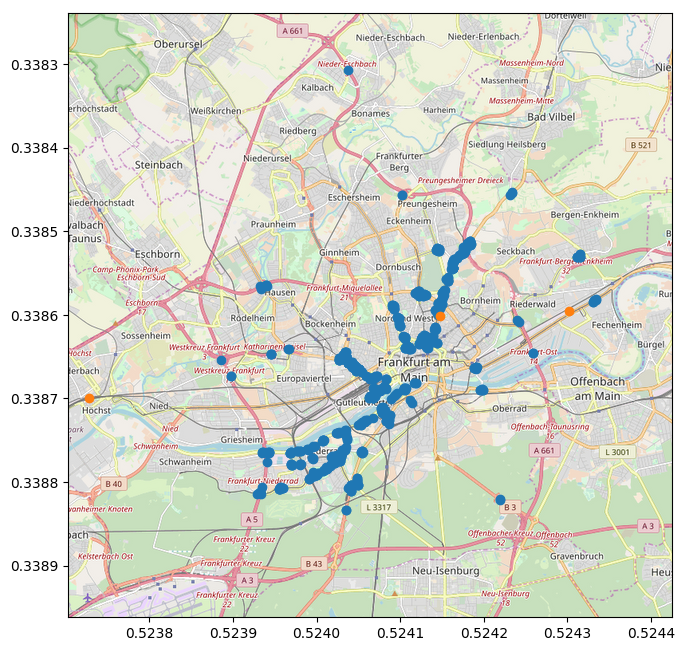

In [8]:
file = "Mobility/dynamische Verkehrsdaten/FFM_DZG_180701/FFM_DEZ_180701.csv"
df, dfLocation = prepareDynData(file)
plotLocation(dfLocation)